# CZ4042 Tutorial 3

# Wee JunJie

1. Training Inputs for a dichotomizer are given as: 

$$\mathbf{x_1} = \left[
\begin{array}{c}
5\\
1\\
\end{array}
\right]; \mathbf{x_2} = \left[
\begin{array}{c}
7\\
3\\
\end{array}
\right]; \mathbf{x_3} = \left[
\begin{array}{c}
3\\
2\\
\end{array}
\right]; \mathbf{x_4} = \left[
\begin{array}{c}
5\\
4\\
\end{array}
\right]; \quad \text{Class 1}$$ 

$$\mathbf{x_5} = \left[
\begin{array}{c}
0\\
0\\
\end{array}
\right]; \mathbf{x_6} = \left[
\begin{array}{c}
-1\\
-3\\
\end{array}
\right]; \mathbf{x_7} = \left[
\begin{array}{c}
-2\\
3\\
\end{array}
\right]; \mathbf{x_8} = \left[
\begin{array}{c}
-3\\
0\\
\end{array}
\right]; \quad \text{Class 2}$$


(a) Determine whether the two classes of patterns are linearly separable and find the center of gravity of patterns in each class

In [7]:
import tensorflow as tf
import numpy as np
import pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as ticker

import os
if not os.path.isdir('figures'):
	print('creating the figures folder')
	os.makedirs('figures')

In [10]:
# data
X = np.array([[5, 1],[7, 3], [3, 2], [5, 4], [0, 0], [-1, -3], [-2, 3], [-3, 0]])
Y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# class means
no_classes = 2
no_data = len(X)
mu = np.zeros((no_classes,2))
nc = np.zeros(no_classes)
for p in range(no_data):
    mu[Y[p]] += X[p]
    nc[Y[p]] += 1
mu /= nc
print('centroids: %s'%mu)

centroids: [[ 5.   2.5]
 [-1.5  0. ]]


(b) If the center points of two clusters of class 1 and class 2 are vectors $\chi_1$ and $\chi_2$, show
that linear decision boundary that passes through the middle point of the line
joining the two centroids can be expressed in the form

$$\bigg(\chi_1-\chi_2\bigg)^T\mathbf{X} + \frac{1}{2}\bigg(\big|\big|\chi_2\big|\big|^2-\big|\big|\chi_1\big|\big|^2\bigg)=0$$

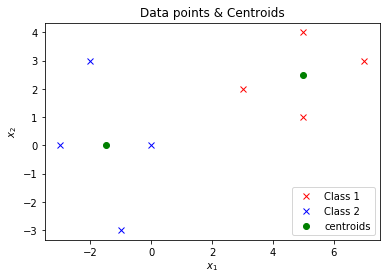

In [30]:
# plot data points and centroids

plt.figure(1)
plt.plot(X[Y==0,0],X[Y==0,1],'rx',label='Class 1')
plt.plot(X[Y==1,0],X[Y==1,1],'bx',label='Class 2')

plt.plot(mu[:,0],mu[:,1],'o',color='green',label='centroids')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Data points & Centroids')
plt.savefig('./figures/tut3_1a.png')

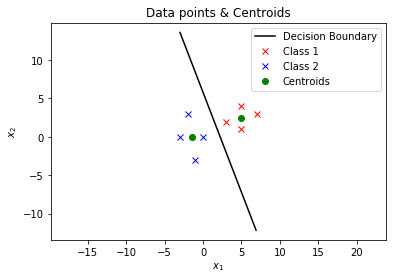

In [31]:
# plot decision boundary 

plt.figure(2)
w = mu[0]-mu[1]
b = 0.5*(np.dot(mu[1],mu[1])-np.dot(mu[0],mu[0]))

x1 = np.arange(-3,7,0.1)
x2 = np.zeros(len(x1))
for i in range(len(x1)):
    x2[i]=-(w[0]*x1[i]+b)/w[1]
plt.plot(x1,x2,'-',color='black',label='Decision Boundary')
plt.axis('equal')

plt.plot(X[Y==0,0],X[Y==0,1],'rx',label='Class 1')

plt.plot(X[Y==1,0],X[Y==1,1],'bx',label='Class 2')

plt.plot(mu[:,0],mu[:,1],'o',color='green',label='Centroids')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.title('Data points & Centroids')
plt.savefig('./figures/tut3_1b.png')

(c) Design a dichotomizer using a perceptron having the decision boundary as in part
(b) for the given classification and determine how it recognizes the following input
patterns

$$\mathbf{v_1} = \left[
\begin{array}{c}
4\\
2\\
\end{array}
\right]; \mathbf{v_2} = \left[
\begin{array}{c}
0\\
5\\
\end{array}
\right]; \mathbf{v_3} = \left[
\begin{array}{c}
\frac{36}{13}\\
0\\
\end{array}
\right];$$ 

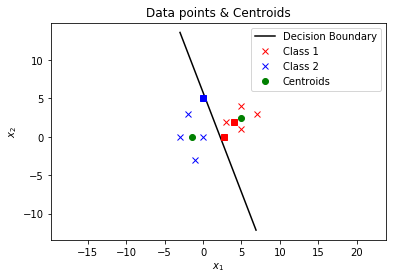

In [42]:
# test decision boundary on new inputs 

v = np.array([[4,2], [0,5], [36/13, 0]])
y = np.zeros(3) 

for i in range(len(x)):
    y[i] = (np.dot(v[i],w)+b <= 0)

# plot data with new inputs classification  
plt.figure(3)
w = mu[0]-mu[1]
b = 0.5*(np.dot(mu[1],mu[1])-np.dot(mu[0],mu[0]))

x1 = np.arange(-3,7,0.1)
x2 = np.zeros(len(x1))
for i in range(len(x1)):
    x2[i]=-(w[0]*x1[i]+b)/w[1]
plt.plot(x1,x2,'-',color='black',label='Decision Boundary')

plt.plot(X[Y==0,0],X[Y==0,1],'rx',label='Class 1')
plt.plot(X[Y==1,0],X[Y==1,1],'bx',label='Class 2')
for i in range(3):
    if y[i] == 0:
        plt.plot(v[i,0],v[i,1],'rs')
    else:
        plt.plot(v[i,0],v[i,1],'bs')

plt.plot(mu[:,0],mu[:,1],'o',color='green',label='Centroids')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis('equal')
plt.legend()
plt.title('Data points & Centroids')
plt.savefig('./figures/tut3_1c.png')